In [14]:
# Analyze comment positivity using Textblob and OpenAI's DaVinci engine

In [15]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
import praw
from textblob import TextBlob

In [17]:
import os

In [18]:
import openai

In [19]:
import csv

In [20]:
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)
pd.set_option('display.max_colwidth', 500)

In [21]:
# READ THE DATA

In [23]:
with open('Comments_Sample/comments_negative.csv', 'r', encoding='cp1252') as f:
    # Create a CSV reader object
    reader = csv.reader(f)
    
    # Read the data into a list
    comments_n = list(reader)[0]

In [25]:
with open('Comments_Sample/comments_positive.csv', 'r', encoding='cp1252') as f:
    # Create a CSV reader object
    reader = csv.reader(f)
    
    # Read the data into a list
    comments_p = list(reader)[0]

In [26]:
#USE TEXTBLOB TO ANALYZE SENTIMENT

In [27]:
def eval_comments(comments):
    comments_df = pd.DataFrame(comments)
    comments_df = comments_df.rename(columns={comments_df.columns[0]: 'text'})
    comments_df['score_TB'] = comments_df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
    
    return comments_df

In [28]:
df_pos = eval_comments(comments_p)
df_pos

,text,score_TB
0,Thanks for the share <3 truly humbled to be in such a amazing community that actively tries its best to make this game the best it can be.,0.412500
1,Yeah they really did nail the visuals for Tempest. My expectations are high for Barnacles & Blackpowder next month.,0.120000
2,"Awesome, if theres anything everyone can agree on its how great the sound design in the game is.",0.450000
3,I think its some of the finest sound design in video games. Outstanding,0.450000
4,"Most satisfying gathering in a game that Ive played, and a lot thanks to the sounds.",0.200000
5,"New world has THE BEST sound design and sound effects of any game. Ever. Period. All the people involved in sound effects, sound design and music deserve an award. They did outstanding work.",0.354545
6,Yea I love logging wood or mining ores in the forest for the sound design alone. Dude has done an amazing job.,0.500000
7,"This is why everyone, literally everyone love sound effects in NW. Now we know that when you make your job with love and inspiration, this is what you get as outcome no matter even if no one actually know you. Now we know him, his dad and their great work. Thank you!",0.480000
8,These sounds are seriously one if my favorite parts of new world. Job very well done sir!,0.138258
9,the sound effect is one of the best things in New World!,0.523485


In [29]:
df_neg = eval_comments(comments_n)
df_neg

,text,score_TB
0,"Jokes aside it is dumb you cant move from those servers to normal ones, not sure prioritizing economy over saving a server is better",0.006250
1,The 2500 player server cap is a gift that keeps on giving. It fragmented the player base after the initial rush faded when the game launched. If fragmented the player base after the initial rush faded with fresh start servers. It has prevented communities from forming or growing throughout the life of this game. Its one of the worst design choices made for this game but was necessary because they insisted on sticking with territory control in the main world instead of instancing that game mo...,-0.296795
2,"frash start servers were such an imbecilic idea, devs should never listen to the players with their dumb takes",-0.187500
3,Yeah it’s pretty dumb that fresh can’t transfer to legacy.,0.058333
4,Im not sure how to feel about another max expertise/gear score increase. It looks like another meaningless way to make us play more without much effort on their part.,-0.012500
5,"I feel like were just waiting for features that should have been in the game from launch, like transmog and gear storage",-0.400000
6,"WHERE IS THE NEW PVP CONTENT? A new map for arenas and cross server capabilities is not new content. Tweaking the PVP track is not new content.Where are the new OPR maps, and new PVP game modes? Changing up the scoring system on the same old stale OPR map is not new PVP content and will not keep the PVP players engaged. The PVE players are getting 3 expeditions and 2 trials, and the PVP players get….. crickets? WTF?",-0.073776
7,"Ags here, we are finally indicating which circles will heal you and which wont. Enjoy your new pvp content (still playing one map two years after release) Lmao /s",0.284091
8,As a semi-casual PvP oriented player Im disappointed with this roadmap. Cross world arenas in winter? No ranked games this year? So many PvE oriented changes and so little PvP focused ones.,-0.109375
9,"putting ""colored outlines for enemy aoes"" into your content roadmap is actually fucking pathetic",-1.000000


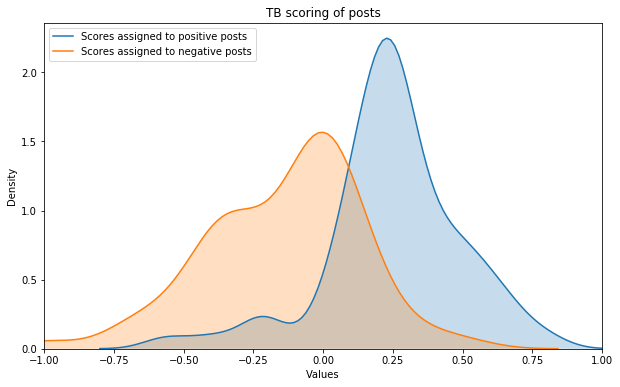

In [31]:
plt.figure(figsize=(10, 6))

sns.kdeplot(df_pos['score_TB'], shade=True, label = 'Scores assigned to positive posts')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('TB scoring of posts')
plt.xlim(-1,1)

sns.kdeplot(df_neg['score_TB'], shade=True, label = 'Scores assigned to negative posts')
plt.xlim(-1,1)

plt.legend(loc='upper left')

plt.show()

In [ ]:
#USE GPT TO ANALYZE SENTIMENT

In [23]:
comments_all = comments_p
comments_all.extend(comments_n)

In [21]:
openai.api_key = os.getenv("OPENAI_API_KEY")

In [22]:
#Use GPT to assess whether comments are positive or negative
def OpenAI_Grade_Comments(comment_list):
    results = []
    
    base_prompt = 'Please classify this comment as positive or negative (Output like Result (reason)): '
    
    for comment in comment_list:
        
        print('zzz')
        #rate limiting
        time.sleep(1.1)
        
        prompt = base_prompt + comment

        response = openai.Completion.create(
        model="text-davinci-003",
        prompt=prompt,
        temperature=0.9,
        max_tokens=64,
        top_p=1.0,
        frequency_penalty=0.0,
        presence_penalty=0.0
        )
        
        query_result = response.choices[0].text.strip()
        
        #Prune noise                                              
        query_result = query_result[query_result.find("Result"):]
        
        results.append(query_result)
    
    return results   

In [ ]:
results = OpenAI_Grade_Comments(comments_p[:8])

In [ ]:
for i in range (0,len(results)):
    print(results[i])
    print()
    print(f'Original Comment: {comments_ironic[i]}')
    print()
    print('--------')
    print()